# Introduction

Welcome to the hands-on lab for **Code Practices**. 
* There are several code practices that you should adopt to become a more security-conscious developer.
* Storing secrets securely on GitHub and using a secrets manager like Hashicorp Vault or the Linux pass command are good places to start. But you also need to practice making your code more secure.

In this lab, 
* You will look at how you can make your code more secure and then practice what you have learned.
* You will practice how to write more secure code in Python web applications written with the Flask framework.

# Learning Objectives

After completing this lab, you will be able to:
* Create HTTP security headers using `flask-talisman`
* Evaluate a Python Flask application’s code practices
* Set up and launch a backend application UI
* Establish Cross-Origin Resource Sharing (CORS) policies using `flask-cors`

# Security Code Practices

To build secure applications, developers need to follow the DevSecOps model. This model shifts security concerns to a higher priority, so they are dealt with early in the software development lifecycle.

Security Code Practices are a set of practices that developers follow to ensure their application is secure from the beginning of the software development lifecycle. Some practices we will follow are:
* Setting HTTP headers
* Implementing Cross-Origin Resource Sourcing (CORS) policies
* Working with Credentials and GitHub
* Using the Vault


# Improving security with HTTP headers

* The first thing you can do to improve the security of your application is to set **secure HTTP headers**. 
* You can do this by simply wrapping your Flask application with a Python package called `Flask-Talisman`.

## Example

The following is a very basic Flask application that does not implement security.

```
from flask import Flask

app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
    """Base URL for our service"""
    return app.send_static_file("index.html")
```

This application simply sends back a static HTML page called `index.html` from the root `/` URL.

## Security Improvement

This version of the application uses `Flask-Talisman` to add security headers that reject loading content from other sites, making your application more secure.

```
from flask import Flask
from flask_talisman import Talisman

app = Flask(__name__)

# Create a content security policy and apply it
csp = {
    'default-src': '\'self\''
}
talisman = Talisman(app, content_security_policy=csp)

@app.route('/', methods=['GET'])
def index():
    """Base URL for our service"""
    return app.send_static_file("index.html")
```

**Did you notice that only two lines of code were added?**

These two simple lines have made this application more secure by adding security headers to every response. If someone attempts a script injection attack that tries to load content from outside of the original Web site, it will be blocked by the security policy without you having to do anything more.

Let’s look at what happened to make this application more secure:

1. **Line 2** imports the `Talisman` class from the `flask_talisman` package, which you can install with `pip install flask-talisman`.

2. **Lines 6 - 8** Create a content security policy for `Talisman`. This is the default policy. A Website administrator wants all content to come from the site’s own origin (**this excludes subdomains**). This means that you cannot have things like libraries, images, and fonts on your Web site that are loaded from other sites. If you need this, you must specify it in the content security policy.

3. **Line 9** instantiates a `Talisman` object passing in the Flask app from **line 4** and the content security policy from **line 6**.

## Results

```
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
Content-Security-Policy: default-src 'self'
Referrer-Policy: strict-origin-when-cross-origin
```

The output above shows the additional security headers like `X-Frame-Options`, `X-XSS-Protection`, and `X-Content-Type-Options` that were not present before Talisman was used. It also added a `Content-Security-Policy` and `Referrer-Policy` to ensure that requests can only be made from the same origin.

`Talisman` also ensures that your domain uses **HTTPS** instead of **HTTP**. In the Cloud IDE environment, we proxy the application internally, so it is already using **HTTPS**, but you will notice the difference in your own applications.

You can also use the `@talisman` decorator to gain more control over security at the route level if needed.

Now let’s take a more in-depth look at **Cross-Origin Resource Sharing (CORS)**.

# Cross Origin Resource Sharing (CORS)

To explain CORS, let’s start with an example.

Imagine you have created a web application where you provide data to one specific customer. To obtain the data, your customer has their own application that sends a GET request to your application endpoint. But what if their competitor discovers you and wants your data? They could just use the application endpoint you sent your customer!

This is known as cross-origin resource sharing, where the **origin** is the address of the application calling your endpoint (your customer’s app and their competitor’s app), and the resource is the data in your endpoint. The important thing is that it’s a different origin accessing resources on another origin.

# Step 1: Set up the backend service

* The backend service is written in Python using the Flask framework.
* In this step, you will clone the GitHub repository that has the code using `git`, install the required Python packages using `pip` the Python Package Manager, and start the application using `flask`.

## Your Task

1. Open a terminal from the menu bar at the top of the Cloud IDE editor using **`Terminal -> New Terminal`** and execute the code below:
```
cd /home/project
```

2. Run the following **`git clone`** command to download the code from the repository, and then **`cd`** into the **`DevSecOps-HTTP-app`** folder that is created:
```
git clone https://github.com/ibm-developer-skills-network/DevSecOps-HTTP-app.git
cd DevSecOps-HTTP-app/
```

3. Run the following `pip install` command to install just the required Python package dependencies for this lab.
```
pip install --user -r requirements.txt
```

4. Run the following `flask` command to start the application backend.
```
flask run --reload
```

> **Note**: The **`--reload`** option will tell Flask to reload the application when any changes are made to the source code. This is especially useful when developing.

## Results

You should see output similar to this:

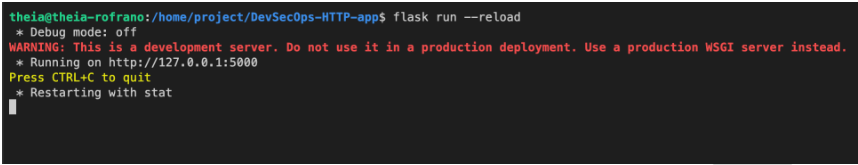

Congratulations! 
* You’ve successfully launched the Flask application. 
* The application should now be running on `localhost` and listening on port `5000` (the default port for Flask).

# Step 2: Launch backend application UI

Now that the backend Flask application is running, you can launch the UI to ensure it is working properly.

## Your Task

1. Open the Skills Network extension and select `Launch Application` using port `5000` and the path `/posts`, or press the `[Launch Application]` button below.



The web page should look like this:

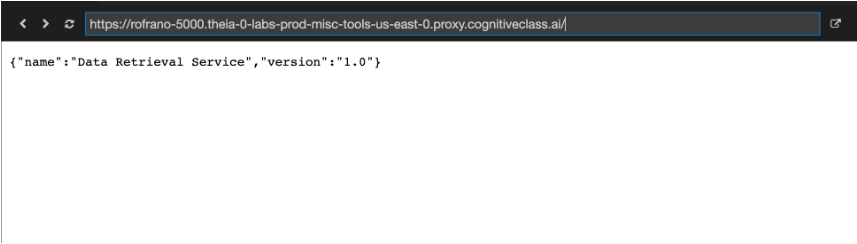

2. Add the path `/posts` to the application URL and press ENTER to see the data that will be returned to the client application.

## Results

You should see raw JSON data being sent back to the client. Note that your data will be different because the backend generates random posts every time you call it. The important thing is that you are seeing JSON data returned.

This is the raw `json` data that the `/posts` endpoint returns to the client application.

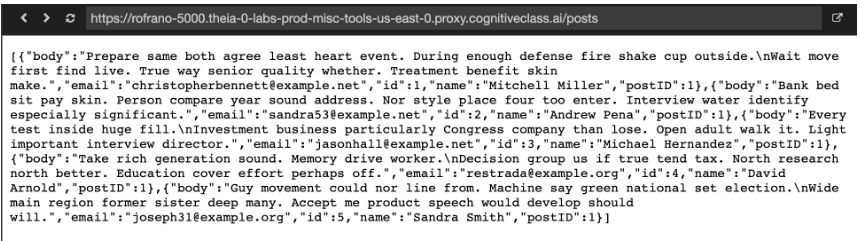

You have successfully set up the backend API that will provide data!

# Step 3: Set up the client application

Now we will set up the client application that is buying our data. Let’s get that set up.

You need to modify the frontend application to call the backend you just deployed. To do this, you will need to modify the frontend code with the URL of your backend, which is unique to you as a Cloud IDE user.

## Your Task

1. First, go to the application tab and copy the URL of the Flask application to the clipboard.

> (It should look similar to this `https://user-5000.theia-0-labs-prod-misc-tools-us-east-0.proxy.cognitiveclass.ai/posts` where `user` is your **Theia userid**)

2. Next, navigate to `/home/project/DevSecOps-HTTP-app/frontend/src/components/` and open the `data.jsx` file in the IDE editor or press the button below:

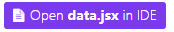

3. Now, replace `http://127.0.0.1:5000/posts` on **line 10** with the URL you copied.

> Make sure `/posts` is added on the end of the URL!

The IDE should automatically save your changes.

4. Finally, open a new terminal window with `Terminal -> New Terminal` and run the following commands to start the frontend application:

```
cd /home/project/DevSecOps-HTTP-app/frontend/
npm i
npm start
```

> *Note: It will take a long time for all of the JavaScipt libraries to download before the application can start.*


## Results

This should start the frontend application without any errors, even though there may be some warnings.

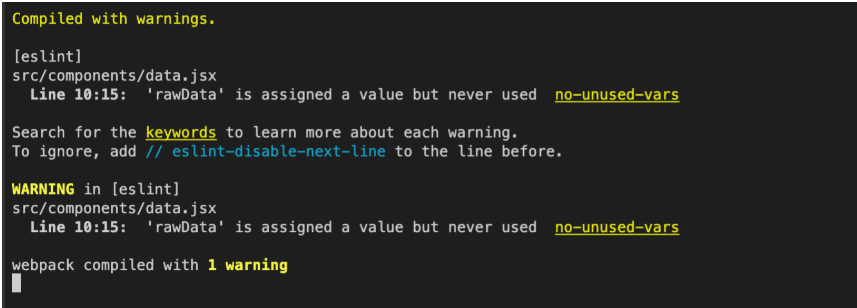

# Step 4: Launch client application UI

After starting the client application in the previous step, it is time to launch the web UI and see if it is working.

## Your Task

Open the Skills Network extension and select `Launch Application` using port `3000` or press the `[Launch Application]` button below.



## Results

You should see something like this:

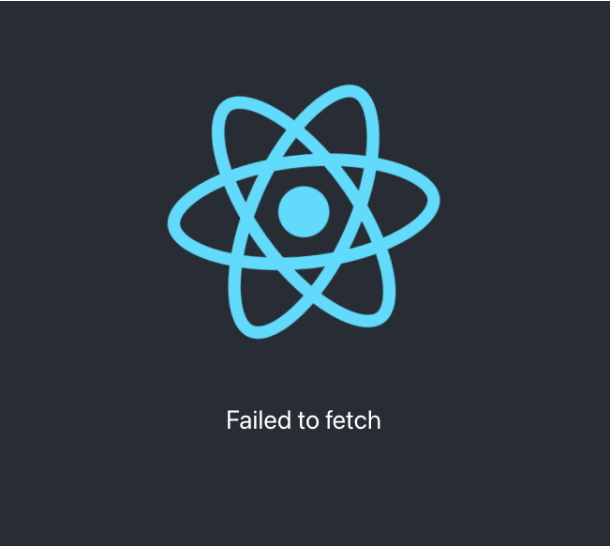

And in the console that you can open by right-clicking the page and selecting `Inspect` or `Cmd + Shift + C`, you should see something similar so the example below. Note that the domains will be different.

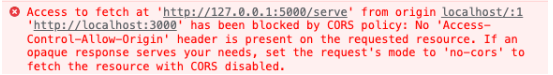

The request to the backend has been blocked by a CORS policy that is denying access from any endpoint except the origin. You will fix this in the next step.

# Step 5: Update the CORS policy

In order for your client frontend application to be able to talk to the backend, you must add the URL of the client application to the CORS policy on the backend. You can do this by editing the `app.py` file and replacing the default `http://localhost:3000` with the URL your application is running in the Cloud IDE environment.

## Your Task

1. First, copy the URL of the client application to the clipboard.

> (It should look similar to this `https://user-3000.theia-0-labs-prod-misc-tools-us-east-0.proxy.cognitiveclass.ai` where `user` is your Theia userid)

2. Then, open up the `app.py` file in the `DevSecOps-HTTP-app` folder or press the `[Open App.py in IDE]` button below:

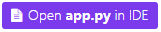

3. Next, on **line 14**, replace `http://localhost:3000` with the URL you copied.

> Ensure the end of the URL does NOT have `/` on the end

You are now ready to reload the application and see the results of this change.

# Step 6: Reload the application UI

You now need to reload the client application. You should be able to simply press the reload button on the internal browser to reload the web page. If it does not load, you may need to copy the link and reopen it using Private/Incognito mode in your browser.

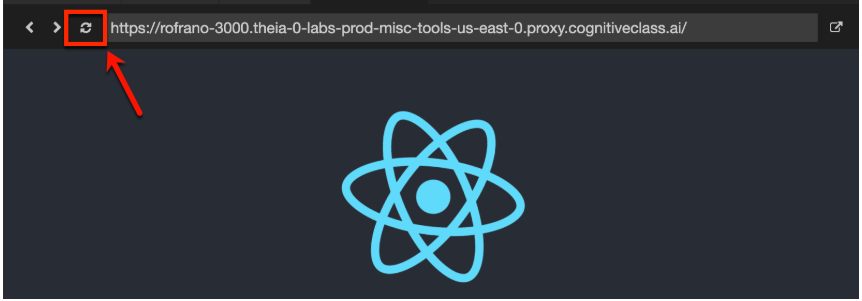

## Results

You should see a table of data in the frontend application that was retrieved from the backend. Your data will differ because the backend generates new data with every call. The important thing is that you are seeing a table of data and not a failure message anymore.

You have now learned how to restrict access to your data so that only those you specify can access it. Your client should see something like this:

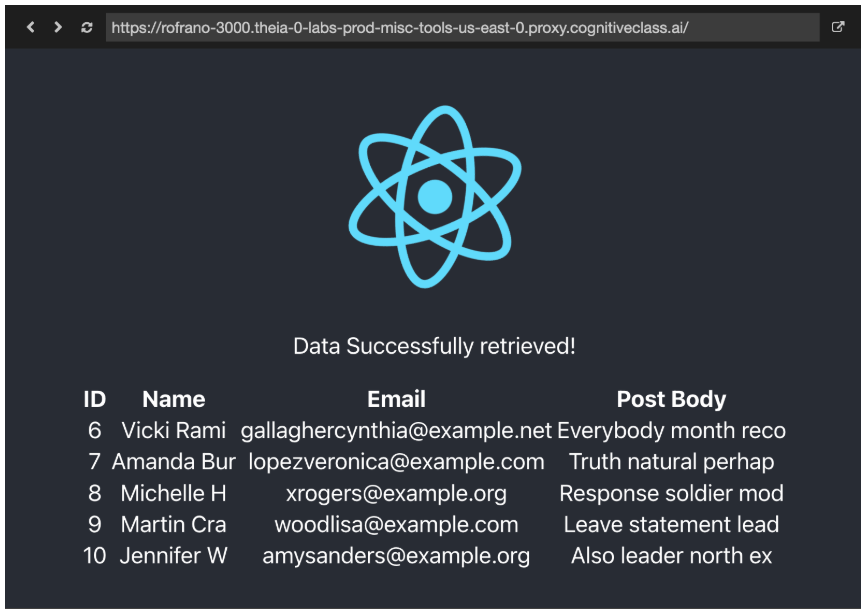

This means our app is being securely accessed by requests we know, and it will deny requests we do not know! In production, developers store the origins/URLs they want to give permissions to in environment variables, as the origin of a client application can be different in staging or testing environments.

# Conclusion

In this lab, you learned how CORS works in a browser, blocking all requests from origins that are not specifically allowed to have access to a given resource. You also created HTTP security headers, and by setting up backend application UIs and client application UIs, you were able to enable CORS to help you share your data specifically with a client.

You also learned that by implementing `flask-talisman`, you could instantly make your flask application more secure.

# Next steps

Visit the **[flask-talisman](https://github.com/GoogleCloudPlatform/flask-talisman)** site to learn more about how you can implement HTTP headers to make your specific flask application more secure. And practice adding `Flask-CORS` and `Flask-Talisman` to your Python Flask applications to make them more secure.